# Machine Learning in Python - Project 1

Due Friday, April 15th by 5 pm UK local time.

*include contributors names here*

## 0. Setup

In [1]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [2]:
# Load data
d = pd.read_csv("../hotel.csv")

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

In [3]:
d.head(10)

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,0,Resort Hotel,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,0,Resort Hotel,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,0,Resort Hotel,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,0,Resort Hotel,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
5,0,Resort Hotel,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
6,0,Resort Hotel,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0
7,0,Resort Hotel,9,2015,July,27,1,0,2,2,...,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1
8,1,Resort Hotel,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1
9,1,Resort Hotel,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0


### Missing values visualization

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
##missing columns : children, country, company, agent

In [6]:
##proportion of missing values
missing_df= d.isnull().sum() / len(d)
missing_df = missing_df[missing_df > 0]
missing_df.sort_values(inplace=True)
missing_df

children    0.000034
country     0.004087
agent       0.136862
company     0.943069
dtype: float64

Missing values in children,country,company and agent. But mostly company has a high number of missing values, probably because only a few number of bookings were made by companies.

In [7]:

missing_df = pd.DataFrame(data=missing_df)
missing_df.columns = ['count']
missing_df.index.names = ['Column Name']
missing_df
missing_df['Column Name'] = missing_df.index

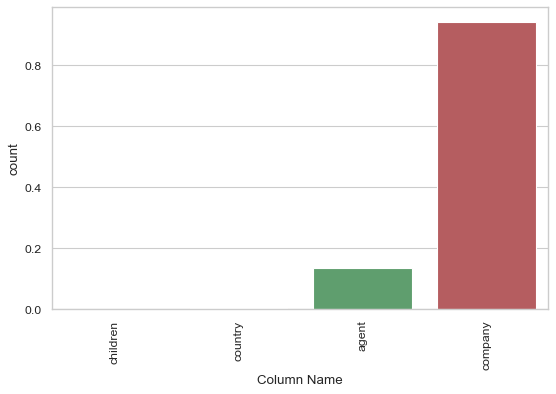

In [8]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'count', data=missing_df)
plt.xticks(rotation = 90)
plt.show()

Since children and country has very small proportion of missing values, we can barely see in any of the graphs.

<Figure size 800x480 with 0 Axes>

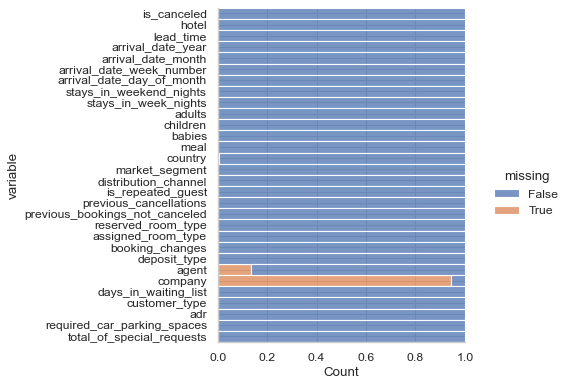

In [9]:
##using seaborn displot
import seaborn as sns


plt.figure(figsize=(10,6))
sns.displot(
    data= d.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

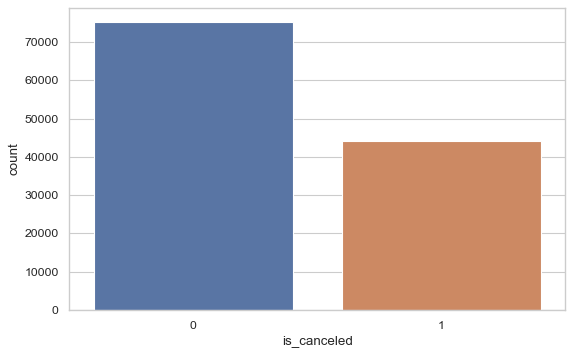

In [10]:
#is outcome inbalanced? : YUP (around 45000 bookings were cancelled)
d['is_canceled'].value_counts()

sns.countplot(x="is_canceled",data=d)


In [11]:
d.iloc[:,0:10].describe(include="all")
#most of the bookings wer made for city hotels
#most of the booking were made for august(nice weather?)
#min val for adults is 0, which is not possible? 
#minimum requirement for a booking is atleast 1 adult

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults
count,119390.000000,119390,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
unique,NaN,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN
top,NaN,City Hotel,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN
freq,NaN,79330,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN
mean,0.370416,NaN,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403
std,0.482918,NaN,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261
min,0.000000,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000
50%,0.000000,NaN,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000
75%,1.000000,NaN,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000


In [12]:
d.iloc[:,10:21].describe(include="all")
#not important: but someone got 10 babies? DAMN
#People go for Bed and Breakfast the most
#most of the bookings were made from portugal(49000)

#2 extra room types in assigned room types(12 \neq 10)
# A is the preferred room type:Sometimes the assigned room type differs 
#from the reserved room type due to hotel operation reasons (e.g. overbooking) 
#or by customer request. Code is presented instead of designation for anonymity reasons

#market segment/distribution: dont know what these columns mean exactly
#will comment later

,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type
count,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12
top,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A
freq,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053
mean,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN
std,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
75%,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN


In [13]:
d.iloc[:,21:29].describe(include="all")

##max booking changes were 21
## most people book without no deposit:more than 87% of the bookings
## adr is negative? 
##Average Daily Rate as defined by dividing the sum of all 
##lodging transactions by the total number of staying nights
##this can't be negative; somethings wrong >_<

,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces
count,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000
unique,NaN,3,NaN,NaN,NaN,4,NaN,NaN
top,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN
freq,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN
mean,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518
std,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291
min,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000
25%,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000
50%,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000
75%,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000


### Data Exporation

<AxesSubplot:xlabel='hotel', ylabel='count'>

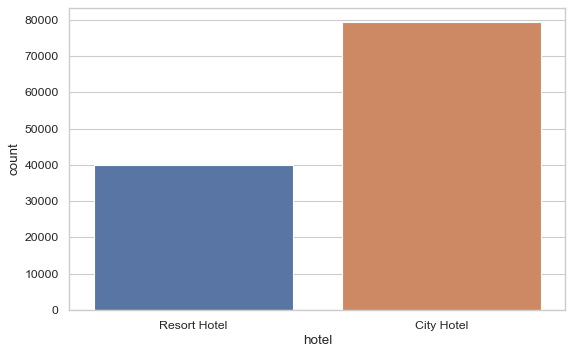

In [14]:
##which hotel type do people prefer
sns.countplot(x="hotel",data=d)

C:\Users\keith\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='arrival_date_month'>

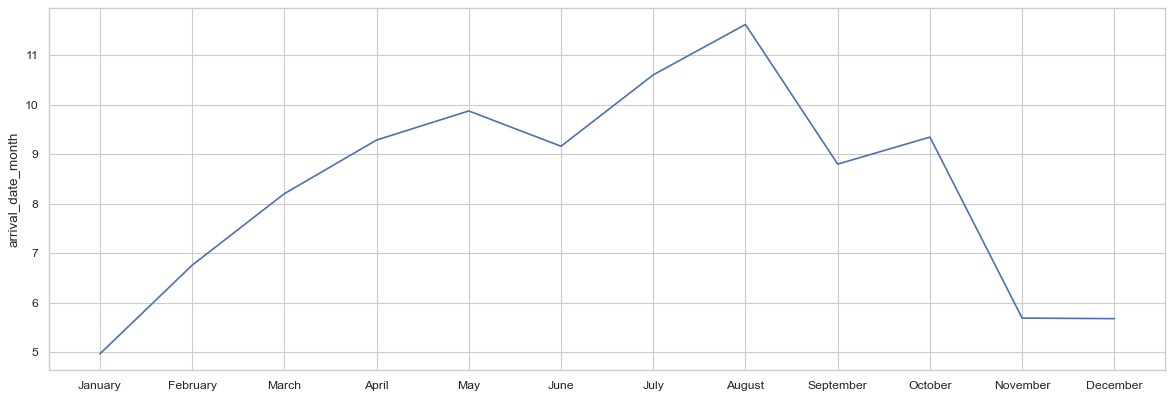

In [15]:
##seasonal bookings

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = d['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

plt.figure(figsize= (18,6))
sns.lineplot(x,y)


In [17]:

d["date"] = pd.to_datetime(d.arrival_date_day_of_month.astype(str) + "-"  + d.arrival_date_month + "-" + d.arrival_date_year.astype(str))
d.index = d["date"]

df_date = d.groupby(
    d.index
).agg({"is_canceled": ["sum", "count"]})

df_date.loc[:,("not_canceled", "n_sum")] = df_date["is_canceled"]["count"] - df_date["is_canceled"]["sum"]
df_date = df_date["is_canceled"].rename(columns={'sum': 'canceled_booking', 'count': 'total_booking'})
df_date["good_booking"] = df_date["total_booking"] - df_date["canceled_booking"]
df_date["good_to_cancel_diff"] = df_date["good_booking"] - df_date["canceled_booking"]
df_date["good_to_cancel_ratio"] = df_date["good_booking"] / df_date["canceled_booking"]
df_running_mean = df_date.rolling(window = 7).mean()
df_running_mean.columns = [col + "_mean"  for col in df_running_mean.columns]
df_date.reset_index(inplace=True)
mdf_date = df_date.melt(id_vars=["date"], var_name = "data_type", value_name = "value" )

df_running_mean.reset_index(inplace=True)
mdf_rm = df_running_mean.melt(id_vars=["date"], var_name = "data_type", value_name = "value")

df_full_date = pd.concat([mdf_date, mdf_rm])

<AxesSubplot:xlabel='date', ylabel='value'>

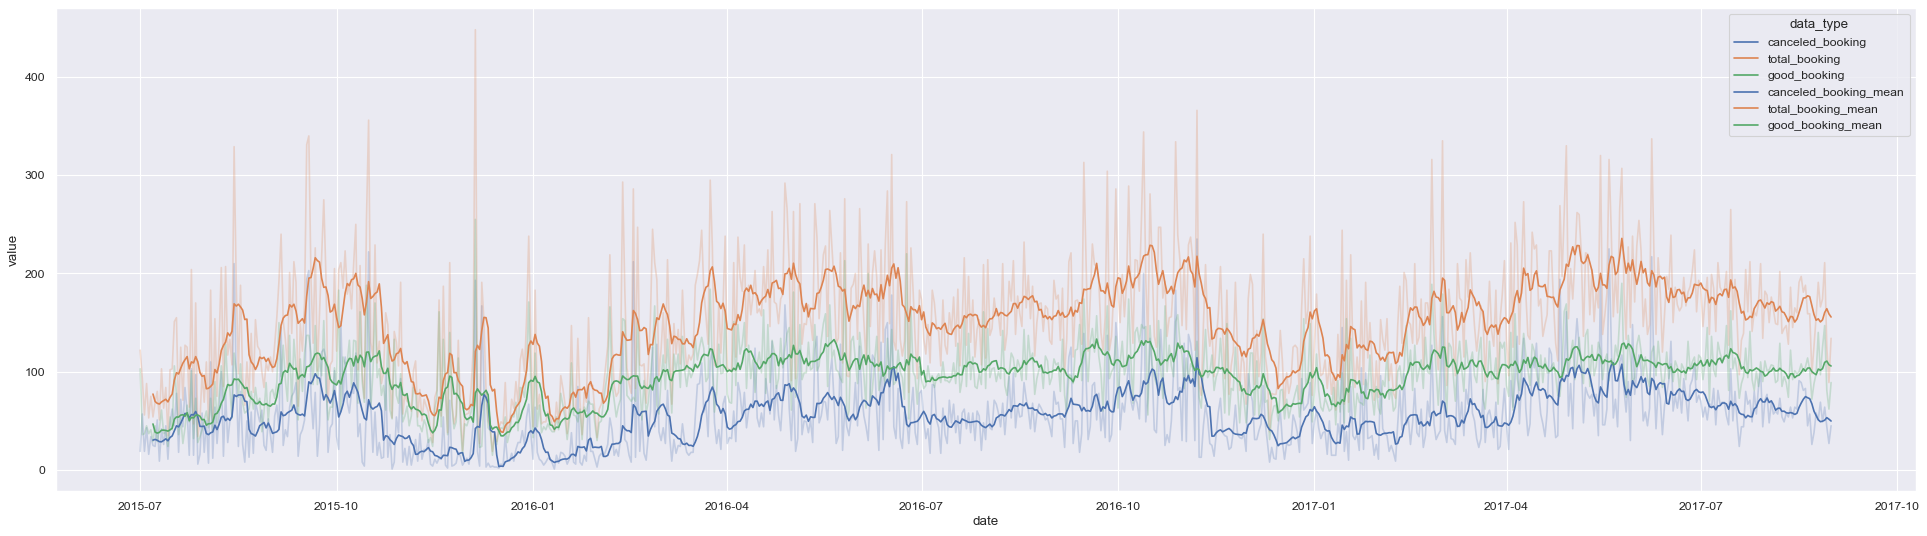

In [18]:
#plot 1 total. canceled, and good bookings
p1df = df_full_date[df_full_date["data_type"].isin(["canceled_booking", "total_booking", "good_booking"])]

sns.set(rc={'figure.figsize':(30,8)})
sns.lineplot(data = p1df, x = "date", y = "value", hue = "data_type",alpha  = 0.25)

# plot2 just plot1 too messy, looking at running averages of 7 days 
p2df = df_full_date[df_full_date["data_type"].isin(["canceled_booking_mean", "total_booking_mean", "good_booking_mean"])]
sns.lineplot(data = p2df, x = "date", y = "value", hue = "data_type")

<AxesSubplot:xlabel='date', ylabel='value'>

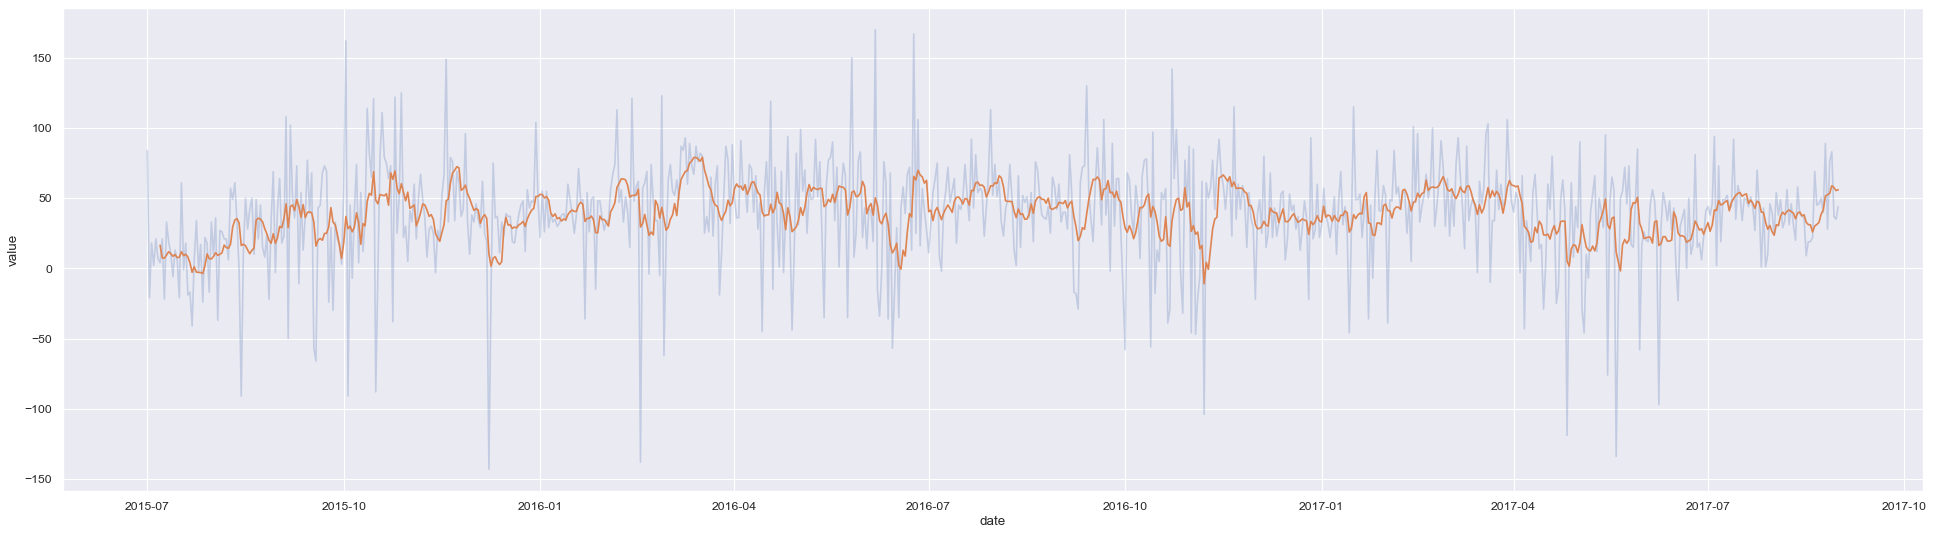

In [19]:
#plot 1 good to cancel diffirence
p1df = df_full_date[df_full_date["data_type"].isin(["good_to_cancel_diff"])]

sns.set(rc={'figure.figsize':(30,8)})
sns.lineplot(data = p1df, x = "date", y = "value",alpha  = 0.25)

# plot2 just plot1 too messy, looking at running averages of 7 days 
p2df = df_full_date[df_full_date["data_type"].isin(["good_to_cancel_diff_mean"])]
sns.lineplot(data = p2df, x = "date", y = "value")

<AxesSubplot:xlabel='date', ylabel='value'>

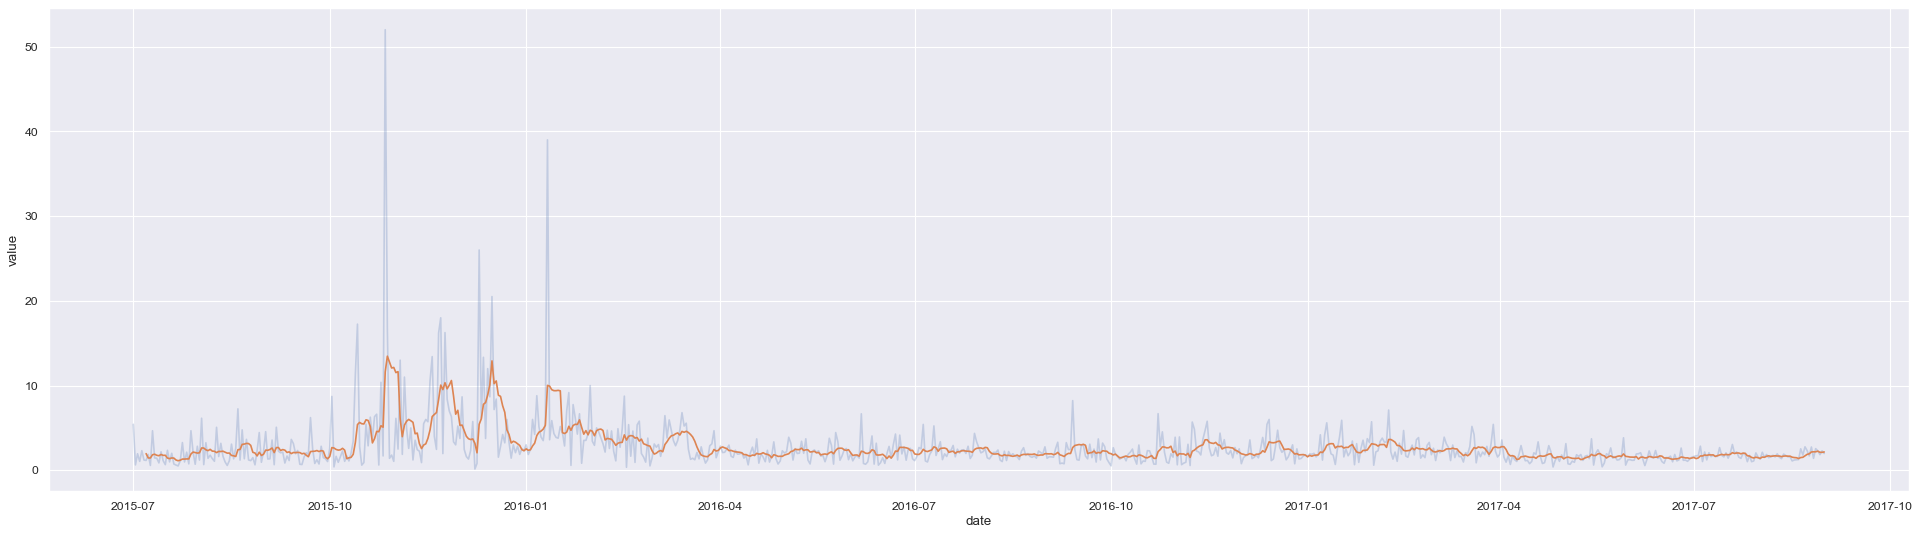

In [20]:
#plot 1 good to cancel diffirence
p1df = df_full_date[df_full_date["data_type"].isin(["good_to_cancel_ratio"])]

sns.set(rc={'figure.figsize':(30,8)})
sns.lineplot(data = p1df, x = "date", y = "value",alpha  = 0.25)

# plot2 just plot1 too messy, looking at running averages of 7 days 
p2df = df_full_date[df_full_date["data_type"].isin(["good_to_cancel_ratio_mean"])]
sns.lineplot(data = p2df, x = "date", y = "value")

In [75]:
# naive bayes simple inplemational
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score


d.arrival_date_month = d["date"].dt.month

nbd = d.drop(["country", "date"], axis = 1)
nbd.children = nbd["children"].fillna(0)
nbd["agent"] = ((nbd["agent"].fillna(0)) != 0).astype(int)
nbd["company"] = ((nbd["company"].fillna(0)) != 0).astype(int)
nbd.reset_index(inplace=True, drop = True)

ohe_col = nbd.select_dtypes(exclude = np.number).columns
ohe = OneHotEncoder(sparse = False)
nbdohe = ohe.fit_transform(nbd[ohe_col])
nbdohe = pd.DataFrame(nbdohe)
nbdohe.columns = ohe.get_feature_names_out()
nbd = pd.concat([nbd,nbdohe], axis = 1).drop(ohe_col, axis = 1)
X = nbd.drop("is_canceled", axis = 1)
y = nbd["is_canceled"]

X = X.reset_index(drop = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 332)

standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

nb_class = GaussianNB()
nb_class.fit(X_train, y_train)

y_pred  =  nb_class.predict(X_test)
y_pred 
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm
ac

def test_nb(times, seed = 40, tst_size = .3):
    np.random.seed(seed)
    seed_list = np.random.randint(0,1000000,size=times)
    ac = []
    for i in range(times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tst_size, random_state = seed_list[i])

        standard = StandardScaler()
        X_train = standard.fit_transform(X_train)
        X_test = standard.transform(X_test)
        nb_class = GaussianNB()
        nb_class.fit(X_train, y_train)
        y_pred  =  nb_class.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        ac.append(accuracy_score(y_test,y_pred))
    return ac

GaussianNB()

0.7527856036955253

In [78]:



test_nb(10,555)

[0.7469078929000196,
 0.7470474914146914,
 0.7512912862607142,
 0.7500628193316023,
 0.7485272356702125,
 0.7553117234832621,
 0.7495881843817181,
 0.754446212692297,
 0.7500069799257336,
 0.7552558840773934]

In [81]:
d["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

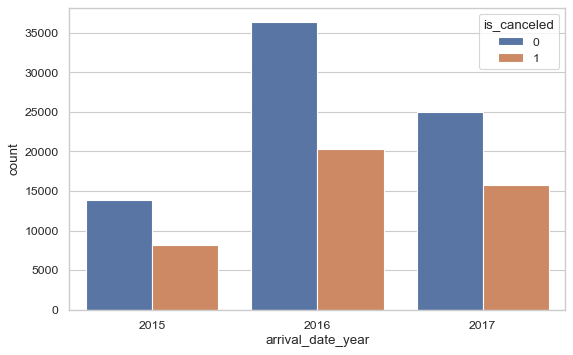

In [20]:
##percentage of booking each year, and cancellations each year
sns.countplot(x="arrival_date_year",hue="is_canceled",data=d)


In [45]:
pip install pycountry

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=2c05febd4cd83c44648f56a88949b74db99699520389e421b7ba3023980b062e
  Stored in directory: c:\users\anoushka\appdata\local\pip\cache\wheels\e2\aa\0f\c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [48]:

def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

C:\Users\ANOUSHKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

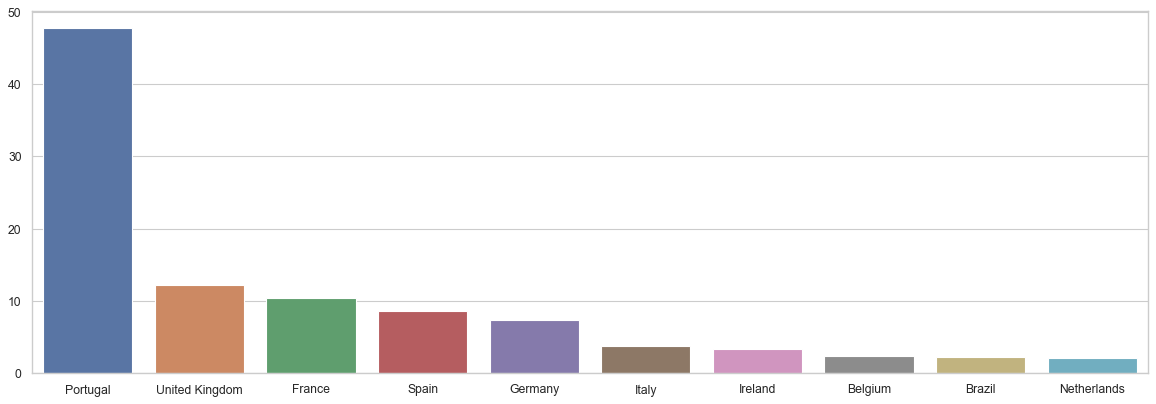

In [49]:
##which countries people book from the most(top 10)
import pycountry as pc

x,y = get_count(df['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plt.figure(figsize=(18,6))
sns.barplot(country_name,y)

In [12]:
##which agent people use more frequently to book 
##here we see agent 9 is most popular
##change to categorical variable
d['agent'].mode()

0    9.0
dtype: float64

Dropping company since most of it has NaN's.

In [13]:
df =d.drop(columns = ['company'])

In [14]:
##there are 333 different agents
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

In [15]:
##here we all the different numbers assigned to each of the 333 agents
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

Here, we can either fill the nan's with some arbitrary value or drop the agent column, but dropping it can lead to loss of information since a lot of people have booked through an agent.

what we did till now:
Dropped company from the dataframe.
Did some data exploration


### Imputing missing values

In [16]:
df.isna().sum()

is_canceled                           0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [17]:
##for children: cant impute with mean/median since they are decimal and we need integers
##so again we replace with mode
df['children'].mode()

0    0.0
dtype: float64

In [18]:
#mode=0
df['children'] = d['children'].fillna(0)

In [19]:
##for country: replace missing value with the mode(most-frquent value)
df['country'].mode()

0    PRT
dtype: object

In [20]:
#mode='PRT'
df['country'].fillna('PRT',inplace=True)

In [21]:
df.isna().sum()

is_canceled                           0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [22]:
#deleting values of adr less than 0
df = df[df['adr'] > 0]

Remove outliers for logistic regression and Support vector machines
(use the below code to  do so maybe? or something better if you have anything)

In [23]:
##do we remove outliers?
##outlier removal code
###

# cleaned = df.copy()

# columns = [
#     'lead_time',
#     'stays_in_weekend_nights',
#     'stays_in_week_nights',
#     'adults',
#     'children',
#     'babies',
#     'adr',
# ]

# for col in columns:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)

#     iqr = q3 - q1
#     lower = q1 - 1.5 * iqr
#     upper = q3 + 1.5 * iqr

#     print(f'Lower point: {round(lower, 2)} \t upper point: {round(upper, 2)} \t {col}')
    
#     if lower == upper:
#         continue
    
#     cond1 = (cleaned[col] >= lower) & (cleaned[col] <= upper)
#     cond2 = cleaned[col].isnull()
#     cleaned = cleaned[cond1 | cond2]


## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. logistic regression, classification trees, SVC, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

## 4. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of the client who is with the hotel data and university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*